# What we know about our variables so far
* We know that some variables contain missing data
* We know that numeric variables do not show a gaussian distribution
* We have categorical variables that we need to encode so that the computer can understand them (basically turn them into numbers)

# Feature Engineering
in this notebook we will engineer / pre-process the variables of the House Price Dataset. We want to handle:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Standarise the values of the variables to the same range

### Setting the seed

It is important to note that we are engineering variables and pre-processing data with the idea of deploying the model. Therefore, from now on, for each step that includes some element of randomness, it is extremely important that we **set the seed**. This way, we can obtain reproducibility between our research and our development code.

This is perhaps one of the most important lessons that you need to take away from this course: **Always set the seeds**.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

pd.pandas.set_option('display.max_columns', None)

# loading data
import os
def load_data(path):
    # point to the data set directory and choose the file to load
    p = path
    os.chdir(p) 

    #choose a data set
    while True:
        files = []
        with os.scandir(p) as dir:
            for count,entry in enumerate(dir):
                print(f"{count}) {entry.name}")
                files.append(entry.name)




        data = int(input('Enter the file index: '))
        data = os.path.join(p,files[data])
        if not data.endswith('.csv'):
            p = data
            print("\nThis is a directory\n")
        else:
            print(data)
            break
            
    return data

path = r'E:\Documents\Data\Datasets'

In [2]:
data = load_data(path)
df = pd.read_csv(data)
print(df.shape)
df.head()

0) ArXiv_old.csv
1) mbti_1.csv
2) news.csv
3) US_Accidents_Dec19.csv
4) cannabis.csv
5) r_dataisbeautiful_posts.csv
6) deepnlp
7) fake-and-real-news-dataset
8) game-of-thrones-srt
9) books.csv
10) graduate-admissions
11) Islander_data.csv
12) mushrooms.csv
13) netflix_titles.csv
14) news-headlines-dataset-for-sarcasm-detection
15) AB_NYC_2019.csv
16) winequality-red.csv
17) StudentsPerformance.csv
18) ted-talks
19) young-people-survey
20) diamonds.csv
21) fake_job_postings.csv
22) developer_survey_2019
23) ETH_1h.csv.csv
24) Video 2020-04-17_2020-05-15 iCburks
25) Video 2013-04-06_2020-05-15 Gabe Flomo
26) Yelp Data
27) Udemy
28) NLP Data
Enter the file index: 27

This is a directory

0) House Prices
Enter the file index: 0

This is a directory

0) data_description.txt
1) test.csv
2) train.csv
Enter the file index: 2
E:\Documents\Data\Datasets\Udemy\House Prices\train.csv
(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Seperate into train and test sets

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, df['SalePrice'],
                                                   test_size = .1,
                                                   random_state = 0) # setting the seed
x_train.shape, x_test.shape

((1314, 81), (146, 81))

# Missing Values


### Handle Categorical Variables

In [8]:
# list of categorical values that contain missing values
missing_categorical = [var for var in df.columns if x_train[var].isnull().sum()>1 and x_train[var].dtypes == 'O']

# print the name of the feature and the percentage of missing values
for cat in missing_categorical:
    print(cat, np.round(x_train[cat].isnull().mean(),3) * 100, '% missing')

Alley 93.8 % missing
MasVnrType 0.5 % missing
BsmtQual 2.4 % missing
BsmtCond 2.4 % missing
BsmtExposure 2.5 % missing
BsmtFinType1 2.4 % missing
BsmtFinType2 2.5 % missing
FireplaceQu 47.3 % missing
GarageType 5.6000000000000005 % missing
GarageFinish 5.6000000000000005 % missing
GarageQual 5.6000000000000005 % missing
GarageCond 5.6000000000000005 % missing
PoolQC 99.5 % missing
Fence 81.39999999999999 % missing
MiscFeature 96.1 % missing


In [11]:
# Function that replaces NaN in categorical variables with 'missing'
def fill_categorical(df, missing):
    x = df.copy()
    # replaces all of the NaN values with missing
    x[missing] = df[missing].fillna('missing')
    return x

In [13]:
x_train = fill_categorical(x_train, missing_categorical)
x_test = fill_categorical(x_test, missing_categorical)

# check that we have no missing info
x_train[missing_categorical].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

# Handle Numeric Values

In [15]:
# make a list of the numerical values that contain missing values
missing_numeric = [var for var in df.columns if x_train[var].isnull().sum()>1 and x_train[var].dtypes != 'O']

# print the variable and percent of missing values
for num in missing_numeric:
    print(f"{num} {round(x_train[num].isnull().mean(),3)*100}% missing")

LotFrontage 17.7% missing
MasVnrArea 0.5% missing
GarageYrBlt 5.6000000000000005% missing


In [22]:
# replace the missing value with the mode (number that occurs the most)
for num in missing_numeric:
    
    # get the mode for each column
    mode = x_train[num].mode()[0]

    # add a binary variable indicating there was missing information 
    x_train[num+'_na'] = np.where(x_train[num].isnull(),1,0)
    x_train[num].fillna(mode, inplace = True)
    
    x_test[num+'_na'] = np.where(x_test[num].isnull(),1,0)
    x_test[num].fillna(mode, inplace = True)

    
# check that the missing values have been handled
x_train[missing_numeric].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [23]:
# check the binary variables that capture missing information
x_train[['LotFrontage_na','MasVnrArea_na','GarageYrBlt_na']].head()

LotFrontage_na  MasVnrArea_na  GarageYrBlt_na
930                0              0               0
656                0              0               0
45                 0              0               0
1348               1              0               0
55                 0              0               0

# Temporal Variables
We learned in the previous Jupyter notebook, that there are 4 variables that refer to the years in which the house or the garage were built or remodeled. We will capture the time elapsed between those variables and the year in which the house was sold:

In [24]:
def elapsed(df, var):
    # capture the difference between the year variable and when the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [28]:
# changes each of the year variables to the time elapsed
# from the year it was sold instead of the actual year itself
for year in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    x_train = elapsed(x_train, year)
    x_test = elapsed(x_test, year)
    
x_train[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']].head(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
930           2             2          2.0    2009
656          49             2         49.0    2008
45            5             5          5.0    2010
1348          9             9          9.0    2007
55           44            44         44.0    2008
1228          0             0          0.0    2008
963           2             2          2.0    2009
921         108             5          3.0    2008
458          83            12         83.0    2008
1386         28            28         28.0    2006

# Numerical Variables
we will log transform the numerical variables that do not contain zeros in order to obtain a more gaussian like distribution. This tends to help linear machine learning models.

In [34]:
for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    x_train[var] = np.log(x_train[var])
    x_test[var] = np.log(x_test[var])

# check that the test and train set dont have any null values in the engineered variables
print('test',[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if x_test[var].isnull().sum()>0])
print('train',[var for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'] if x_train[var].isnull().sum()>0])

test []
train []


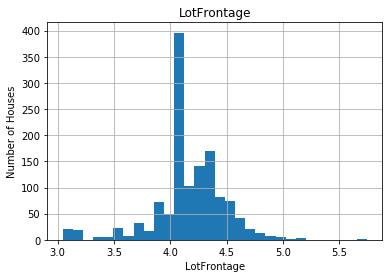

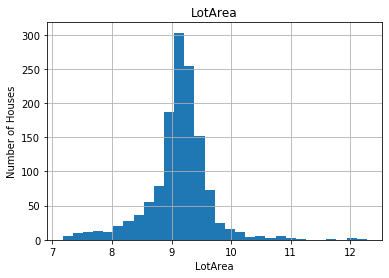

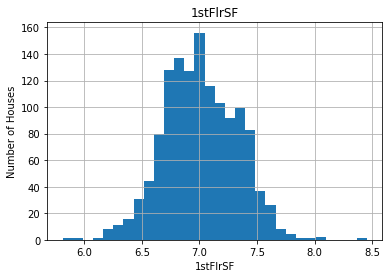

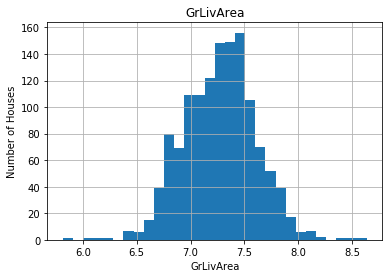

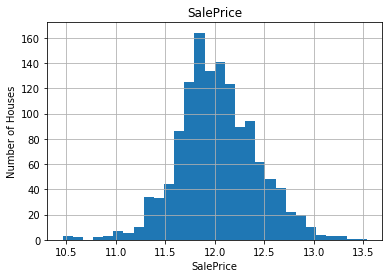

In [35]:
def analyze_cont(df, var):
    df = df.copy()
    df[var].hist(bins = 30)
    plt.ylabel('Number of Houses')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    analyze_cont(x_train,var)

# Categorical Variables
first we'll remove those categories within variables that are present in less than 1% of the observations

In [37]:
categorical = [var for var in x_train.columns if x_train[var].dtype == 'O']
categorical[:5]

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour']

In [60]:
# finds the categories that are shown in more than 1% of the data
def find_frequent(df, var, rarity = .01):
    df = df.copy()
    # gets the percent that each category in a variable shows up (example below)
    temp = df.groupby(var)['SalePrice'].count() / len(df) * 100
    # returns a list of the categories that show up more than 1% 
    # ex: Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')
    return temp[temp>rarity].index

df.groupby('LandContour')['SalePrice'].count() / len(df) * 100

LandContour
Bnk     4.315068
HLS     3.424658
Low     2.465753
Lvl    89.794521
Name: SalePrice, dtype: float64

In [62]:
# for each categorical variable
# make a frequency list that says which categories are in more than 1% of the data
# then for that category see if its in the frequency list
# if it is keep the category name
# if it isnt, replace the category name with rare
for cat in categorical:
    frequent_list = find_frequent(x_train, cat)
    x_train[cat] = np.where(x_train[cat].isin(frequent_list_list),x_train[cat],'rare')
    x_test[cat] = np.where(x_test[cat].isin(frequent_list),x_test[cat],'rare')

# Encode the categorical variables
There are libraries that can do this 
1. [label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
2. [One Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

[documentation on map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)


In [67]:
# this function will assign discrete values to the strings of the variables
# so that the smaller value corresponds to the smaller mean of the target

def replace(train, test, var, target):
    ordinal_labels = train.groupby(var)[target].mean().sort_values().index
    ordinal_label = {label:index for index, label in enumerate(ordinal_labels,0)}
    # ordinal label = {'bnk':0}
    # map will find 'bnk' and convert it to the number 0
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)
    

In [68]:
for category in categorical:
    replace(x_train, x_test, category, 'SalePrice')

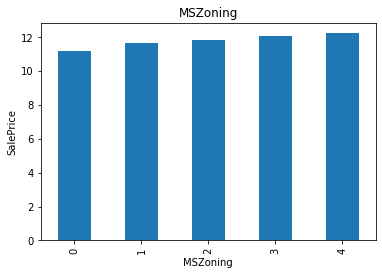

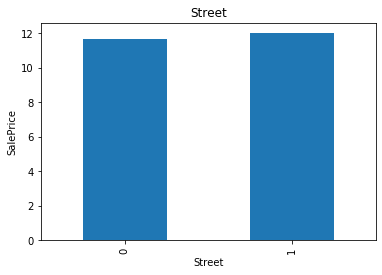

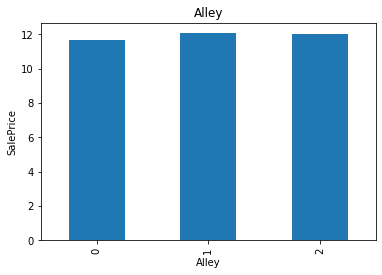

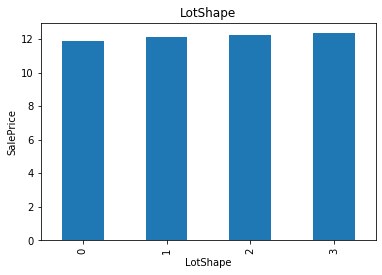

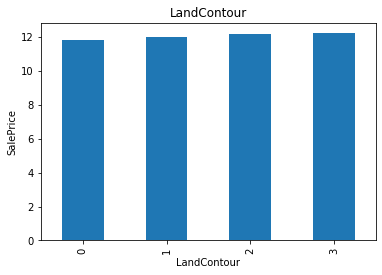

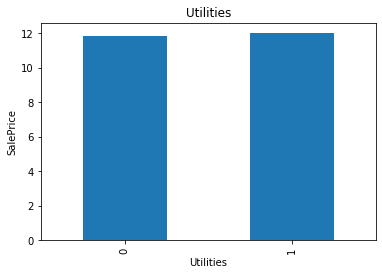

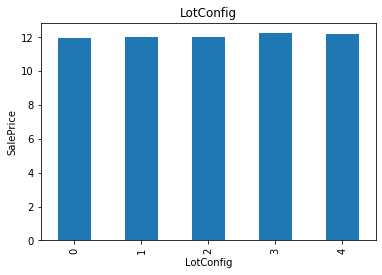

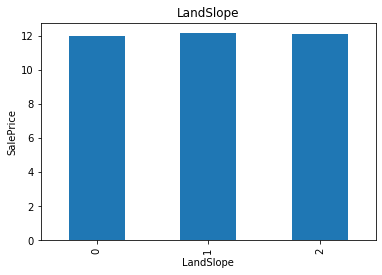

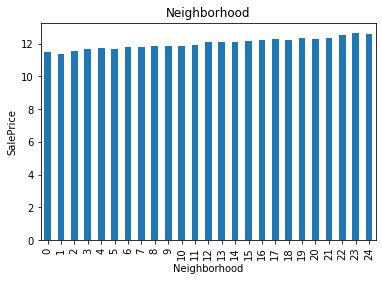

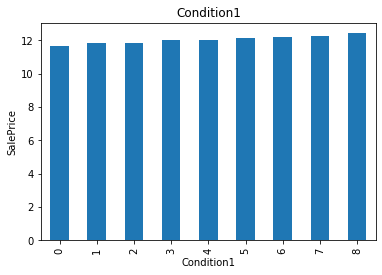

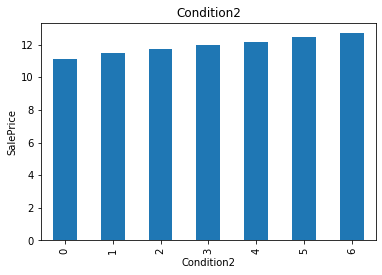

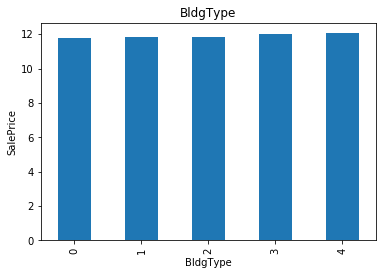

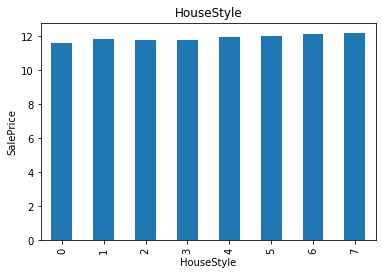

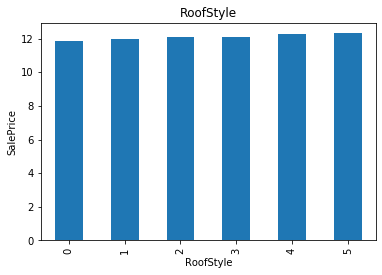

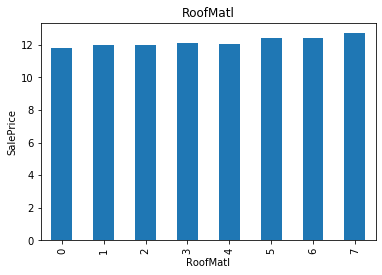

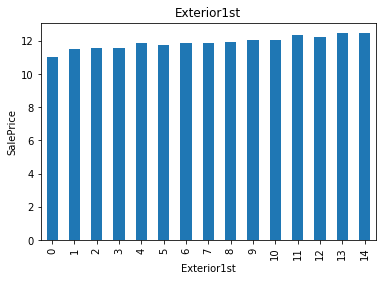

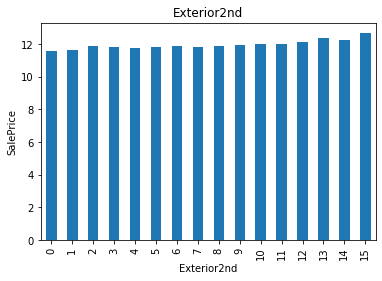

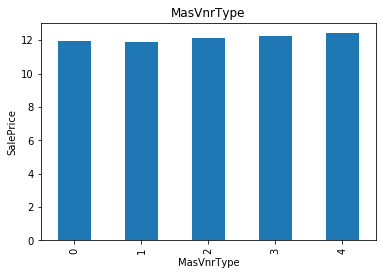

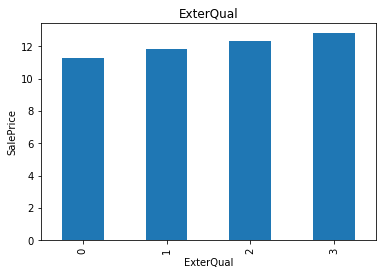

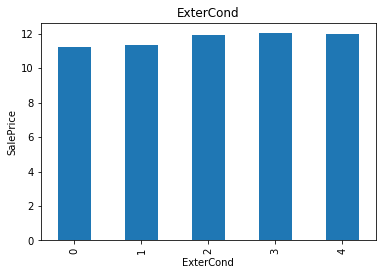

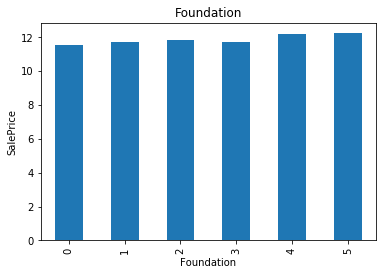

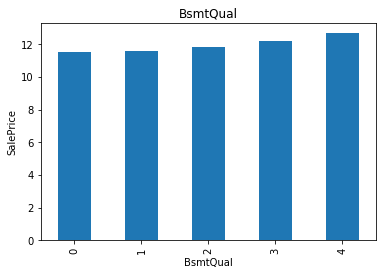

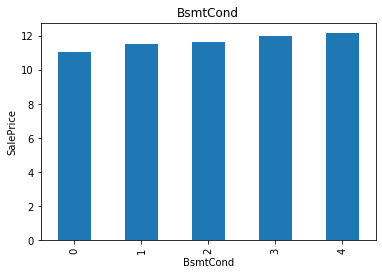

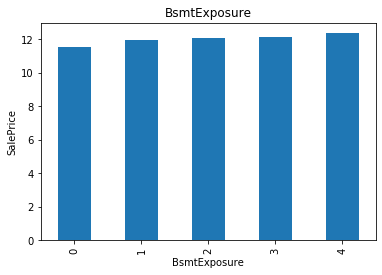

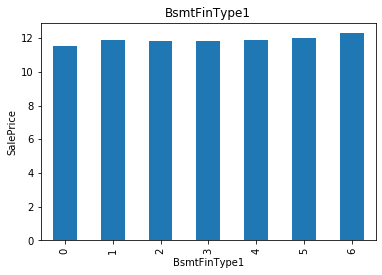

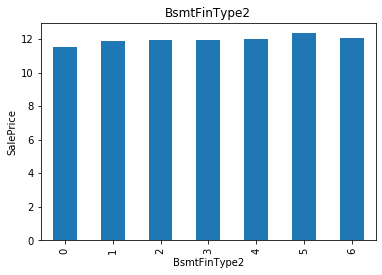

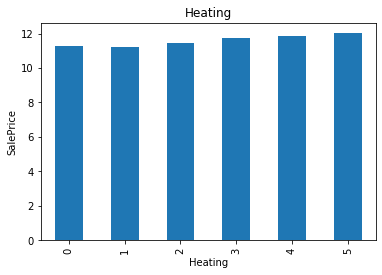

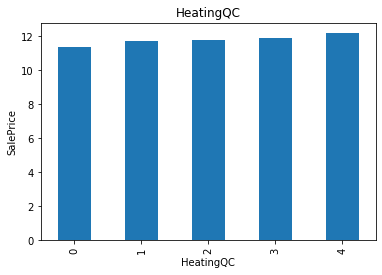

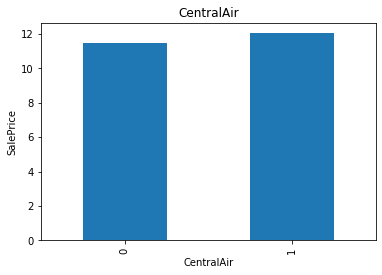

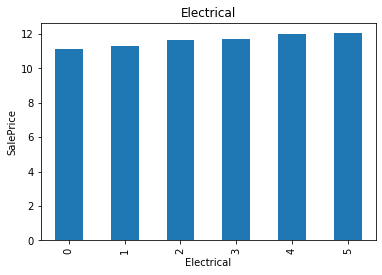

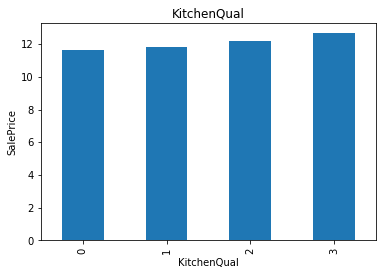

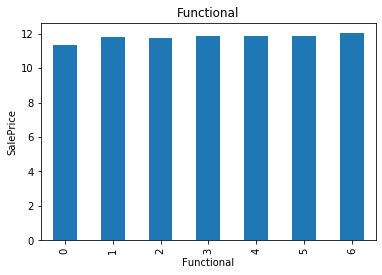

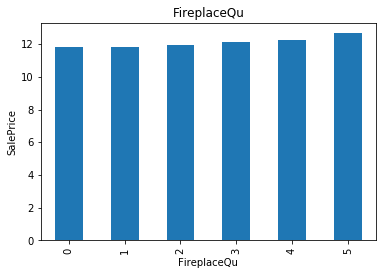

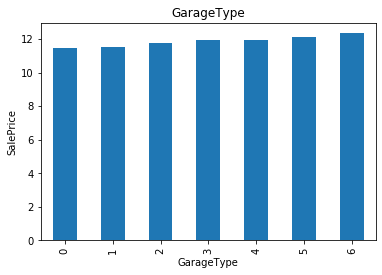

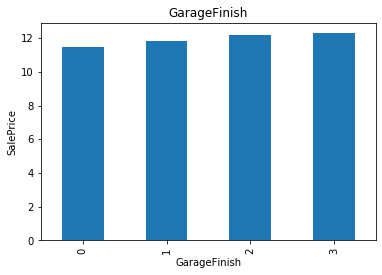

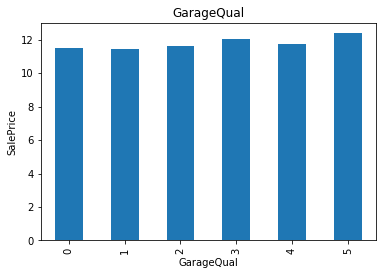

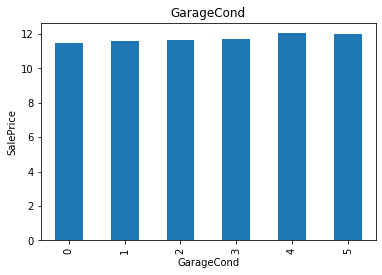

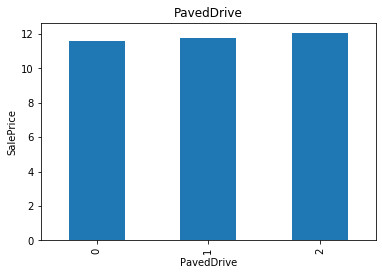

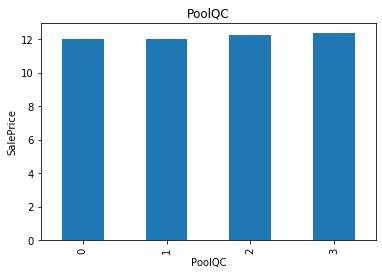

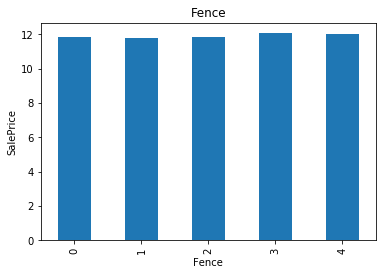

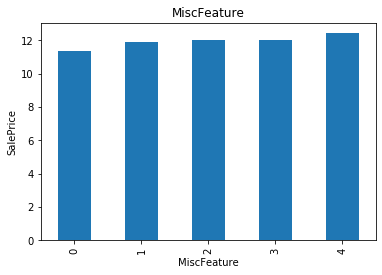

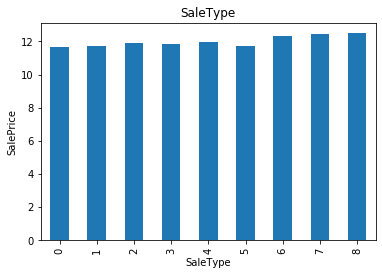

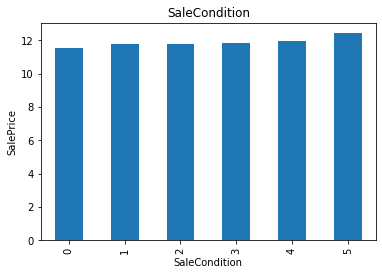

In [69]:
def analyze_dis(df, var):
    df = df.copy()
    # this will group on each feature and plot the median
    # house price based on each discrete variable
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()

for var in categorical:
    analyze_dis(x_train, var)

# Feature Scaling

In [70]:
train_vars = [var for var in x_train.columns if var not in ['Id','SalePrice']]
len(train_vars)

82

In [73]:
x_train[['Id','SalePrice']].reset_index(drop = True)

Id  SalePrice
0      931  12.211060
1      657  11.887931
2       46  12.675764
3     1349  12.278393
4       56  12.103486
...    ...        ...
1309   764  12.727838
1310   836  11.759786
1311  1217  11.626254
1312   560  12.363076
1313   685  12.305918

[1314 rows x 2 columns]

In [74]:
# fit scaler
scaler = MinMaxScaler()
scaler.fit(x_train[train_vars])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [79]:
# transform the train and test set then add the ID and saleprice
x_train = pd.concat([x_train[['Id','SalePrice']].reset_index(drop = True),
                    pd.DataFrame(scaler.transform(x_train[train_vars]), columns = train_vars)],
                   axis = 1)

x_test = pd.concat([x_test[['Id','SalePrice']].reset_index(drop = True),
                    pd.DataFrame(scaler.transform(x_test[train_vars]), columns = train_vars)],
                   axis = 1)


In [81]:
x_train.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0   931  12.211060    0.000000      0.75     0.461171  0.377048     1.0   
1   657  11.887931    0.000000      0.75     0.456066  0.399443     1.0   
2    46  12.675764    0.588235      0.75     0.394699  0.347082     1.0   
3  1349  12.278393    0.000000      0.75     0.388581  0.493677     1.0   
4    56  12.103486    0.000000      0.75     0.577658  0.402702     1.0   

   Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0    1.0  0.333333     1.000000        1.0        0.0        0.0   
1    1.0  0.333333     0.333333        1.0        0.0        0.0   
2    1.0  0.000000     0.333333        1.0        0.0        0.0   
3    1.0  0.666667     0.666667        1.0        0.0        0.0   
4    1.0  0.333333     0.333333        1.0        0.0        0.0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0      0.875000       0.375         0.5      0.75    0.571429     0.777778   
1      0.416667       0.375         0.5      0.75    0.571429     0.444444   
2      0.958333       0.375         0.5      1.00    0.571429     0.888889   
3      0.500000       0.375         0.5      0.75    0.571429     0.666667   
4      0.416667       0.375         0.5      0.75    0.571429     0.555556   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0         0.50   0.014706      0.049180        0.2  0.285714     0.857143   
1         0.75   0.360294      0.049180        0.2  0.285714     0.571429   
2         0.50   0.036765      0.098361        0.6  0.285714     0.428571   
3         0.50   0.066176      0.163934        0.2  0.285714     0.857143   
4         0.50   0.323529      0.737705        0.2  0.285714     0.571429   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0     0.933333        0.25     0.00000   0.666667       0.75         1.0   
1     0.600000        0.50     0.03375   0.666667       0.75         0.4   
2     0.400000        0.50     0.25750   1.000000       0.75         1.0   
3     0.933333        0.25     0.00000   0.666667       0.75         1.0   
4     0.666667        0.50     0.17000   0.333333       0.75         0.4   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0      0.75      0.75          0.75      1.000000    0.002835      0.666667   
1      0.50      0.75          0.25      0.666667    0.142807      0.666667   
2      1.00      0.75          0.25      1.000000    0.080794      0.666667   
3      0.75      0.75          1.00      1.000000    0.255670      0.666667   
4      0.50      0.75          0.25      0.333333    0.086818      0.666667   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0   0.673479     0.239935      1.0       1.00         1.0   
1         0.0   0.114724     0.172340      1.0       1.00         1.0   
2         0.0   0.601951     0.286743      1.0       1.00         1.0   
3         0.0   0.018114     0.242553      1.0       1.00         1.0   
4         0.0   0.434278     0.233224      1.0       0.75         1.0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         1.0  0.559760       0.0           0.0   0.523250      0.000000   
1         1.0  0.434539       0.0           0.0   0.406196      0.333333   
2         1.0  0.627205       0.0           0.0   0.586296      0.333333   
3         1.0  0.566920       0.0           0.0   0.529943      0.333333   
4         1.0  0.549026       0.0           0.0   0.513216      0.000000   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0  0.666667       0.0         0.375      0.333333     0.666667   
1           0.0  0.333333       0.5         0.375      0.333333     0.666667   
2           0.0  0.666667       0.0         0.250      0.333333     1.000000   
3           0.0  0.666667       0.0         0.375      0.333333  

In [83]:
x_train.to_csv(r'E:\Documents\Data\Datasets\Udemy\House Prices\xtrain.csv', index = False)
x_test.to_csv(r'E:\Documents\Data\Datasets\Udemy\House Prices\xtest.csv', index = False)

